## Reading Population Data

In [3]:
import pandas as pd
mlb=pd.read_csv('mlb.csv')
print(mlb.head())
print(mlb.shape) 
# shows the shape of the data - number of rows and columns
# population - 1034 people

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [4]:
# Summary Statistics

print(mlb.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


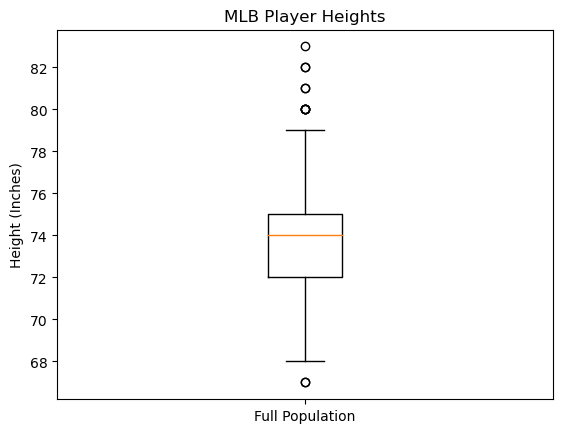

In [5]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height']])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1], ['Full Population'])
plt.show()

In [6]:
# Random Samples

# “Recruiting a sample is something you should do carefully, to make sure the sample resembles the full population as much as possible”
# best way to collect sample = random sample

sample1=mlb.sample(n=30,random_state=8675309)
sample2=mlb.sample(n=30,random_state=1729)
# sample() randomly selects samples

sample3=[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75,76, 76, 75, 75, 81,77, 75, 77, 75,\
         77, 77, 75, 75]

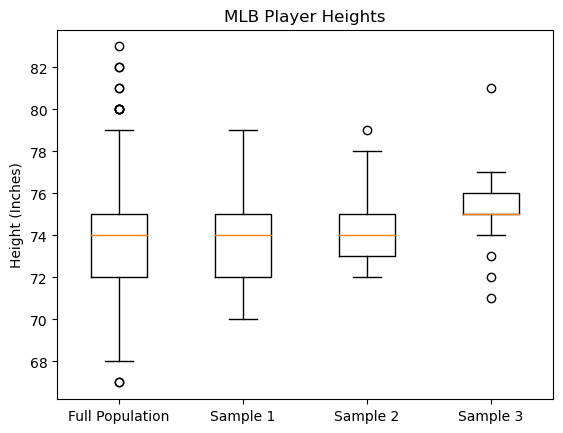

In [7]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'],sample1['height'],sample2['height'],np.array(sample3)])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4], ['Full Population','Sample 1','Sample 2','Sample 3'])
plt.show()

In [8]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.43333333333334


In [9]:
# expected value - mean height of full population
print(np.mean(mlb['height']))

73.6972920696325


In [10]:
# Differences Between Sample Data

alldifferences=[]
for i in range(1000):
    newsample1=mlb.sample(n=30,random_state=i*2)
    newsample2=mlb.sample(n=30,random_state=i*2+1)
    alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())

print(alldifferences[0:10])

[0.8333333333333286, -0.30000000000001137, -0.10000000000000853, -0.1666666666666572, 0.06666666666667709, -0.9666666666666686, 0.7999999999999972, 0.9333333333333371, -0.5333333333333314, -0.20000000000000284]


/Users/ShreenidhiAyinala/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


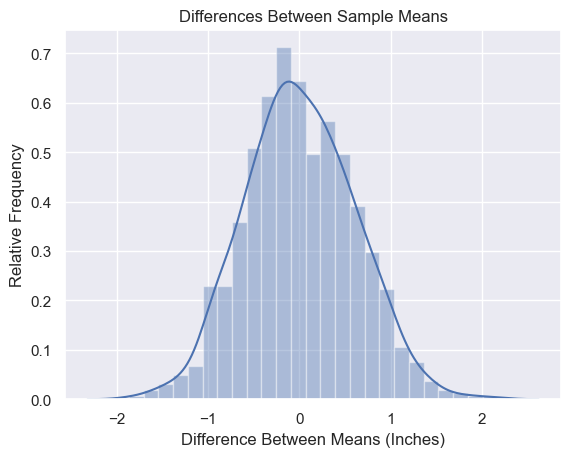

In [11]:
import seaborn as sns
sns.set()
ax=sns.distplot(alldifferences)
plt.title("Differences Between Sample Means")
plt.xlabel('Difference Between Means (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

“A histogram showing the distribution of differences between mean heights of random samples, creating an approximate bell curve pattern”

In [12]:
# bell curve
# “One powerful theoretical result in statistics is called the central limit theorem, and it states that under a 
# certain set of common conditions, differences between means of samples will be distributed in a shape that’s approximately a bell curve.”
# “The technical conditions that make this theorem true are that the random samples are independent and identically 
# distributed (that is, random draws from the same population) and that the population has a finite expected value and a finite variance.”

In [13]:
largedifferences=[diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))
# mlb population have means that differ by 1.6 or more only about 8 in 1000 times or 0.8 percent of the time
# ^ p-value

8


In [14]:
# “low p-value causes us to reject the notion that these two groups come from the same population”

In [15]:
smalldifferences=[diff for diff in alldifferences if abs(diff)>=0.6]
print(len(smalldifferences))

314


In [16]:
# “The p-values we’ve calculated here have led us to accept the notion that sample1 and sample2 come from the same 
# population, and to reject the notion that sample1 and sample3 come from the same population.”

## Performing Hypothesis Testing

Hypothesis 0 sample1 and sample3 are random samples from the same population.

Hypothesis 1 sample1 and sample3 are not random samples from the same population.

Hypothesis 0 - null hypothesis

“The null hypothesis asserts that both samples are randomly drawn from one population (our baseball player dataset), with just one mean and one standard deviation.”

Hypothesis 1 - alternative hypothesis

“The alternative hypothesis asserts that the samples are randomly drawn from two totally different populations, each with its own mean, its own standard deviation, and all of its own unique characteristics.”


“The p-value size that we believe justifies rejecting Hypothesis 0 is called the significance level”
- most common significance level is 5 percent

“When we find a p-value that’s less than our chosen significance level, we say that the difference between our groups is statistically significant”

In [17]:
# The t-Test

import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample2['height'])
# ttest_ind checks for the difference between the samples

Ttest_indResult(statistic=-1.0839563860213952, pvalue=0.2828695892305152)

In [18]:
# 0.283 is higher than 0.05 -> indicates samples are from same population
# -> we do not reject the null hypothesis

In [19]:
scipy.stats.ttest_ind(sample1['height'],sample3)

Ttest_indResult(statistic=-3.108694797644094, pvalue=0.002910554741439718)

In [20]:
# 0.003 < 0.05, suggests rejecting null hypothesis

ttest_ind -> independent variables - no relationship between individuals in each of the samples

ttest_rel -> when observations from different samples are related

ttest_equal_var=False -> Welch's test -> compares samples when we don't want to assume that the samples have equal variance

t-test is a parametric test -> relies on assumptions about the distribution of the data in our population

“The t-test relies on several technical assumptions: 
- first, that the groups being compared should have sample means that follow a bell curve; 
- second, that the variances of the groups being compared should be identical (unless using Welch’s t-test); 
- third, that the two groups are independent of each other. 

If these assumptions are not met, the t-test is not completely accurate, though it’s rarely too far from the truth even if the assumptions are not met.”

nonparametric statistics -> fewer assumptions about the distribution of the data

=> Mann-Whitney U test (or Wilcoxon rank-sum test) -> 

In [23]:
scipy.stats.mannwhitneyu(sample1['height'],sample2['height'])

MannwhitneyuResult(statistic=392.0, pvalue=0.38913738408151577)

#### Nuances of Hypothesis testing

important note about p-value: “it tells you the likelihood of observing data, after assuming a null hypothesis to be true”

“Another important nuance is the difference between accepting a hypothesis and failing to reject it. 
- Hypothesis testing has only two possible outcomes: either we reject a null hypothesis, or we decide not to reject the null hypothesis. 
- Failing to reject something is not quite the same as wholeheartedly accepting it, and just because a p-value is not below a significance threshold does not mean that two groups are certainly the same. 

Just because one t-test fails to lead to a rejection of the null hypothesis does not mean that the null hypothesis is certainly true.”

Anna Karenina principle: “all happy families are alike; each unhappy family is unhappy in its own way”

=> “Statistics has an analogous principle: all acceptances of the null hypothesis are alike, but each rejection of the null hypothesis happens for a different reason”



##### Difference between statistical significance and practical significance
- “we might wish to ignore the results of a t-test, since even though a statistically detectable difference exists, it’s not a difference that has any practical consequence. 
- Practical significance is always an important thing to consider during the process of hypothesis testing.”

## Comparing Groups in a Practical Context

In [24]:
desktop = pd.read_csv('desktop.csv')
laptop = pd.read_csv('laptop.csv')

print(desktop.head())
print(laptop.head())

   userid  spending  age  visits
0       1      1250   31     126
1       2       900   27       5
2       3         0   30     459
3       4      2890   22      18
4       5      1460   38      20
   userid  spending  age  visits
0      31      1499   32      12
1      32       799   23      40
2      33      1200   45      22
3      34         0   59     126
4      35      1350   17      85


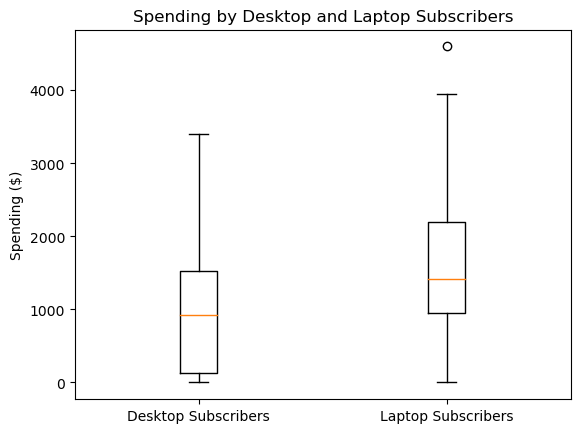

In [25]:
# Goal: To determine whether the users described in the desktop and laptop dataframes differ from each other

import matplotlib.pyplot as plt
sns.reset_orig()
fig1, ax1 = plt.subplots()
ax1.set_title('Spending by Desktop and Laptop Subscribers')
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
ax1.set_ylabel('Spending ($)')
plt.xticks([1,2], ['Desktop Subscribers','Laptop Subscribers'])
plt.show()

Interpretations:
- Both have a minima at 0.
- Laptop subs have a higher 25th, 50th, and 75th percentile.
- Laptop subs have a high outlier

In [27]:
# Summary Statistics
print(np.mean(desktop['age']))
print(np.mean(laptop['age']))

print(np.median(desktop['age']))
print(np.median(laptop['age']))

print(np.quantile(laptop['spending'],.25))
print(np.quantile(desktop['spending'],.75))

print(np.std(desktop['age']))

35.766666666666666
38.733333333333334
32.0
33.0
957.5
1528.25
14.943634839697543


Hypothesis 0  The two email lists are random samples from the same population.

Hypothesis 1  The two email lists are not random samples from the same population.

null hypothesis -> describes a world in which there's a population of people who are interested in desktops AND laptops
- this category of people sign up for company's email lists occasionally
- they choose the list option randomly

alternate hypothesis -> describes a world in which the null hypothesis is not true -> differences in people's taste of desktops vs laptops

“If Hypothesis 0 is true, it would be reasonable to send the same marketing email to both groups. 

If Hypothesis 1 is true, sending different marketing emails to each group makes more sense.”

In [28]:
scipy.stats.ttest_ind(desktop['spending'],laptop['spending'])

Ttest_indResult(statistic=-2.109853741030508, pvalue=0.03919630411621095)

In [ ]:
# 0.04 < 0.05, reject null hypothesis